In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df=pd.read_csv('train.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [2]:
binary_change= {
    'satisfied': 1,
    'neutral or dissatisfied': 0,
}

df['satisfaction_binary'] = df['satisfaction'].replace(binary_change)
df.drop(columns=['Unnamed: 0'], inplace=True)

C:\Users\a_gal\AppData\Local\Temp\ipykernel_9620\1018124088.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['satisfaction_binary'] = df['satisfaction'].replace(binary_change)


In [3]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_binary
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,3,1,4,2,3,2,3,0.0,neutral or dissatisfied,0
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,4,0,0.0,satisfied,1
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,3,2,4,5,5,4,7,14.0,neutral or dissatisfied,0
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,4,5,1,5,4,1,0,0.0,neutral or dissatisfied,0


In [4]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [5]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [28]:
dfSatisfied=df[df['satisfaction_binary'] == 1]
dfDisatisfied=df[df['satisfaction_binary'] == 0]

In [ ]:
# --- 1. Define the Metric Columns to Test ---
# Use the common numeric columns that represent scores/distances/delays.
# Ensure all these columns exist in BOTH dfSatisfied and dfDisatisfied.

metric_columns = [
     'Type of Travel',
     'Class',
     'Flight Distance',
     'Inflight wifi service',
     'Departure/Arrival time convenient',
     'Ease of Online booking',
     'Gate location',
     'Food and drink',
     'Online boarding',
     'Seat comfort',
     'Inflight entertainment',
     'On-board service',
     'Leg room service',
     'Baggage handling',
     'Checkin service',
     'Inflight service',
     'Cleanliness',
     'Departure Delay in Minutes',
     'Arrival Delay in Minutes',
    # Add all other numeric metrics you want to compare
]

# --- 2. Initialize a Dictionary to Store Results ---
results = {
    'Metric': [],
    'Mean_Satisfied': [],
    'Mean_Dissatisfied': [],
    'T_Statistic': [],
    'P_Value': [],
    'Significance (α=0.05)': []
}

# --- 3. Loop Through Columns and Perform T-Test ---
for col in metric_columns:
    # 3a. Isolate and clean data for the current column
    data_sat = dfSatisfied[col].dropna()
    data_dis = dfDisatisfied[col].dropna()

    # Skip if one of the groups has no data
    if len(data_sat) == 0 or len(data_dis) == 0:
        continue

    # 3b. Perform Welch's T-Test (equal_var=False)
    t_stat, p_value = stats.ttest_ind(
        a=data_sat,
        b=data_dis,
        equal_var=False
    )

    # 3c. Store Results
    is_significant = 'Yes (Reject H0)' if p_value <= 0.05 else 'No (Fail to Reject H0)'

    results['Metric'].append(col)
    results['Mean_Satisfied'].append(data_sat.mean())
    results['Mean_Dissatisfied'].append(data_dis.mean())
    results['T_Statistic'].append(t_stat)
    results['P_Value'].append(p_value)
    results['Significance (α=0.05)'].append(is_significant)

# --- 4. Convert Results Dictionary to a DataFrame ---
results_df = pd.DataFrame(results)

# --- 5. Print/Display Results ---
print(results_df.round(4))

In [7]:
list(df)

['id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction',
 'satisfaction_binary']

In [8]:
dfSatisfied.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_binary
count,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,44897.000000,45025.0
mean,65512.609928,41.750583,1530.140255,3.161288,2.970305,3.031582,2.977879,3.521310,4.027474,3.966530,3.964931,3.857324,3.822143,3.966396,3.646041,3.969461,3.744342,12.608084,12.630799,1.0
std,37347.622538,12.767833,1128.126574,1.588697,1.552213,1.575306,1.374244,1.236187,1.191609,1.142077,1.076907,1.127130,1.175515,1.099607,1.158732,1.091486,1.142247,35.382595,35.962008,0.0
min,2.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0
25%,33366.000000,32.000000,526.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.0
50%,65862.000000,43.000000,1250.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000,1.0
75%,97691.000000,51.000000,2405.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000,8.000000,1.0
max,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.0


In [9]:
dfDisatisfied.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_binary
count,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58697.000000,58879.0
mean,64474.259176,37.566688,928.919971,2.399633,3.129112,2.546850,2.976121,2.958050,2.656125,3.036295,2.894156,3.019158,2.990812,3.375991,3.042952,3.388814,2.936123,16.503728,17.127536,0.0
std,37546.516040,16.459825,790.452308,0.964348,1.500368,1.205847,1.198500,1.346607,1.145905,1.303142,1.323619,1.285790,1.303159,1.176978,1.281158,1.175603,1.325955,40.191886,40.560248,0.0
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,31835.500000,25.000000,372.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.0
50%,63970.000000,36.000000,671.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.0
75%,97144.500000,50.000000,1158.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,15.000000,17.000000,0.0
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,0.0


In [45]:
dfDisatisfied_disloyal.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_binary
count,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14448.000000,14489.0
mean,63540.052454,31.096694,709.715439,2.394230,2.287114,2.394092,3.045897,3.011319,2.425426,2.985506,3.030575,3.078059,3.166195,3.564704,3.058941,3.569812,3.044517,15.856443,16.484358,0.0
std,37439.975203,11.286122,507.481985,0.959929,1.376962,1.024201,1.072035,1.384624,1.047718,1.410376,1.388937,1.290407,1.343065,1.078106,1.300556,1.087478,1.392283,38.551476,39.404446,0.0
min,1.000000,7.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,31094.000000,23.000000,337.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.0
50%,61418.000000,28.000000,590.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.0
75%,96500.000000,37.000000,960.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,14.000000,15.000000,0.0
max,129871.000000,85.000000,4963.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,0.0


In [10]:
dfSatisfied

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_binary
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,1
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,1
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,...,5,5,5,4,5,4,4,0.0,satisfied,1
13,83502,Male,Loyal Customer,33,Personal Travel,Eco,946,4,2,4,...,4,5,2,2,2,4,0,0.0,satisfied,1
16,71142,Female,Loyal Customer,26,Business travel,Business,2123,3,3,3,...,5,3,4,5,4,4,49,51.0,satisfied,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103890,80087,Female,Loyal Customer,56,Business travel,Eco Plus,550,3,5,5,...,3,3,3,4,3,3,0,0.0,satisfied,1
103891,83013,Male,Loyal Customer,54,Business travel,Business,1991,5,5,5,...,4,5,4,5,4,4,35,31.0,satisfied,1
103894,86549,Male,Loyal Customer,26,Business travel,Business,712,4,4,4,...,3,4,4,3,4,5,17,26.0,satisfied,1
103897,102203,Female,Loyal Customer,60,Business travel,Business,1599,5,5,5,...,4,4,4,4,4,4,9,7.0,satisfied,1


In [11]:
dfDisatisfied

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_binary
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,3,4,4,4,4,1,0,0.0,neutral or dissatisfied,0
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,3,3,4,3,5,2,9,23.0,neutral or dissatisfied,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103898,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,3,...,4,3,4,2,4,2,0,0.0,neutral or dissatisfied,0
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,3,1,4,2,3,2,3,0.0,neutral or dissatisfied,0
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,3,2,4,5,5,4,7,14.0,neutral or dissatisfied,0
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,4,5,1,5,4,1,0,0.0,neutral or dissatisfied,0


In [12]:
numeric_cols_df = df.select_dtypes(include=np.number)

# Exclude 'id' and any other non-metric numeric columns (like Age)
metrics_to_analyze = [
    'Flight Distance',
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
    'Age' # Including age as a numeric metric to analyze
]

# Filter down to the columns that actually exist and are numeric
analysis_cols = [col for col in metrics_to_analyze if col in numeric_cols_df.columns]

# --- 2. Melt the DataFrame ---
df_melted = df.melt(
    id_vars=['satisfaction'],
    value_vars=analysis_cols,
    var_name='Metric',              # This column now holds the name of the original column
    value_name='Value'              # This column now holds the numeric data
)

# --- 3. Create the Pivot Table ---
pivot_stats = pd.pivot_table(
    df_melted,
    index=['Metric'],
    columns=['satisfaction'],       # 'satisfied' and 'unsatisfied' become columns
    values='Value',
    aggfunc=['mean', 'median', 'std'] # The desired statistics
)

# --- 4. Re-orient to Vertical View ---
# Stacking moves the first level of the column index (mean, median, std) to the rows
vertical_stats_table = pivot_stats.stack(level=0)

# Rename the new index level for clarity
vertical_stats_table.index.set_names(['Metric', 'Statistic'], inplace=True)

# Display the final vertical table
vertical_stats_table

C:\Users\a_gal\AppData\Local\Temp\ipykernel_9620\3011661649.py:47: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  vertical_stats_table = pivot_stats.stack(level=0)


satisfaction                                 neutral or dissatisfied  \
Metric                            Statistic                            
Age                               mean                     37.566688   
                                  median                   36.000000   
                                  std                      16.459825   
Arrival Delay in Minutes          mean                     17.127536   
                                  median                    0.000000   
                                  std                      40.560248   
Baggage handling                  mean                      3.375991   
                                  median                    4.000000   
                                  std                       1.176978   
Checkin service                   mean                      3.042952   
                                  median                    3.000000   
                                  std                       1.281158   
Cleanliness                       mean                      2.936123   
                                  median                    3.000000   
                                  std                       1.325955   
Departure Delay in Minutes        mean                     16.503728   
                                  median                    0.000000   
                                  std                      40.191886   
Departure/Arrival time convenient mean                      3.129112   
                                  median                    3.000000   
                                  std                       1.500368   
Ease of Online booking            mean                      2.546850   
                                  median                    3.000000   
                                  std                       1.205847   
Flight Distance                   mean                    928.919971   
                                  median                  671.000000   
                                  std                     790.452308   
Food and drink                    mean                      2.958050   
                                  median                    3.000000   
                                  std                       1.346607   
Gate location                     mean                      2.976121   
                                  median                    3.000000   
                                  std                       1.198500   
Inflight entertainment            mean                      2.894156   
                                  median                    3.000000   
                                  std                       1.323619   
Inflight service                  mean                      3.388814   
                                  median                    4.000000   
                                  std                       1.175603   
Inflight wifi service             mean                      2.399633   
                                  median                    2.000000   
                                  std                       0.964348   
Leg room service                  mean                      2.990812   
                                  median                    3.000000   
                                  std                       1.303159   
On-board service                  mean                      3.019158   
                                  median                    3.000000   
                                  std                       1.285790   
Online boarding                   mean                      2.656125   
                                  median                    3.000000   
                                  std                       1.145905   
Seat comfort                      mean                      3.036295   
                                  median                    3.000000   
                                  std   

In [13]:
# # --- 1. Define the CORRECTED Palette Dictionary ---
# # We use 'neutral or dissatisfied' as the key, mapped to a color.
# correct_palette = {
#     'satisfied': 'tab:blue',
#     'neutral or dissatisfied': 'tab:orange'  # Mapped to orange, representing the non-satisfied group
# }

# # --- 2. Create the Grouped Bar Plot with the new palette ---
# plt.figure(figsize=(16, 8))

# sns.barplot(
#     data=df_melted,
#     x='Metric',
#     y='Value',
#     hue='satisfaction',
#     errorbar='sd',
#     palette=correct_palette # Use the corrected dictionary
# )

# # --- 3. Format the Chart (rest of the code) ---
# plt.title('Mean of All Metrics Grouped by Satisfaction Status', fontsize=16)
# plt.ylabel('Mean Value (Mixed Scales)', fontsize=14)
# plt.xlabel('Metric', fontsize=14)
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

In [14]:

# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming 'df' is your original DataFrame
# # ----------------------------------------------------
# # 1. Identify the numeric metric columns to scale
# # (Excluding categorical, ID, and the 'satisfaction' column)

# metrics_to_scale = [
#     'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
#     'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
#     'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
#     'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
#     'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Age'
# ]

# # Create a copy of the DataFrame columns to scale
# df_scaled = df[metrics_to_scale].copy()

# # Initialize the scaler
# scaler = MinMaxScaler()

# # Apply scaler to all columns in the copy
# df_scaled[metrics_to_scale] = scaler.fit_transform(df_scaled[metrics_to_scale])

# # Merge the scaled metrics back into the original DataFrame (or a new one)
# df_normalized = df[['satisfaction']].copy()
# df_normalized = pd.concat([df_normalized, df_scaled], axis=1)

# # ----------------------------------------------------
# # 2. Melt the Scaled Data

# # Use the normalized DataFrame for melting
# df_melted_normalized = df_normalized.melt(
#     id_vars=['satisfaction'],
#     value_vars=metrics_to_scale,
#     var_name='Metric',
#     value_name='Normalized_Value' # New column name for the scaled values
# )

# # ----------------------------------------------------
# # 3. Plot the Scaled Data

# plt.figure(figsize=(16, 8))

# correct_palette = {
#     'satisfied': 'tab:blue',
#     'neutral or dissatisfied': 'tab:orange'
# }

# sns.barplot(
#     data=df_melted_normalized,
#     x='Metric',
#     y='Normalized_Value', # Plotting the 0-to-1 scaled values
#     hue='satisfaction',
#     errorbar='sd',
#     palette=correct_palette
# )

# # --- Format the Chart ---
# plt.title('Mean of All Metrics Grouped by Satisfaction Status (Normalized)', fontsize=16)
# plt.ylabel('Normalized Mean Value (Range: 0 to 1)', fontsize=14)
# plt.xlabel('Metric', fontsize=14)
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

In [15]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# # Assuming df_melted is already in your environment from previous steps

# # --- 1. Define the List of Columns to Include (All 1-5 Scale Metrics) ---
# filtered_metrics_1to5 = [
#     'Inflight wifi service',
#     'Departure/Arrival time convenient',
#     'Ease of Online booking',
#     'Gate location',
#     'Food and drink',
#     'Online boarding',
#     'Seat comfort',
#     'Inflight entertainment',
#     'On-board service',
#     'Leg room service',
#     'Baggage handling',
#     'Checkin service',
#     'Inflight service',
#     'Cleanliness',
# ]

# # --- 2. Filter the df_melted DataFrame ---
# # Only keep rows where the 'Metric' is in the list above
# df_melted_filtered_1to5 = df_melted[df_melted['Metric'].isin(filtered_metrics_1to5)]


# # --- 3. Define the CORRECTED Palette Dictionary (as previously fixed) ---
# correct_palette = {
#     'satisfied': 'tab:blue',
#     'neutral or dissatisfied': 'tab:orange'
# }

# # --- 4. Create the Grouped Bar Plot with the FILTERED data ---
# plt.figure(figsize=(16, 8))

# sns.barplot(
#     data=df_melted_filtered_1to5, # Using the filtered data
#     x='Metric',
#     y='Value',
#     hue='satisfaction',
#     errorbar='sd',
#     palette=correct_palette
# )

# # --- 5. Format the Chart ---
# plt.title('Mean Scores for In-Flight and Check-in Metrics by Satisfaction Status', fontsize=16)
# plt.ylabel('Mean Rating (1-5 Scale)', fontsize=14) # Changed Y-label for clarity
# plt.xlabel('Metric', fontsize=14)
# plt.xticks(rotation=45, ha='right')
# plt.ylim(0, 5.5) # Set Y-axis limit appropriate for a 1-5 scale
# plt.tight_layout()
# plt.show()

In [16]:
satisfied_ratings = dfSatisfied['Inflight wifi service'].dropna()
dissatisfied_ratings = dfDisatisfied['Inflight wifi service'].dropna()

# Perform the Two-Sample T-Test (Welch's)
t_statistic, p_value = stats.ttest_ind(
    a=satisfied_ratings,
    b=dissatisfied_ratings,
    equal_var=False
)

# --- Output the Results ---
print(f"--- T-Test Results for Inflight wifi service ---")
print(f"Mean Satisfied: {satisfied_ratings.mean():.3f}")
print(f"Mean Dissatisfied: {dissatisfied_ratings.mean():.3f}")
print("-" * 38)
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.10f}")

--- T-Test Results for Inflight wifi service ---
Mean Satisfied: 3.161
Mean Dissatisfied: 2.400
--------------------------------------
T-Statistic: 89.8547
P-Value: 0.0000000000


In [58]:
# --- 1. Define the Metric Columns to Test ---
# Use the common numeric columns that represent scores/distances/delays.
# Ensure all these columns exist in BOTH dfSatisfied and dfDisatisfied.

metric_columns = [
     'Inflight wifi service',
     'Departure/Arrival time convenient',
     'Ease of Online booking',
     'Gate location',
     'Food and drink',
     'Online boarding',
     'Seat comfort',
     'Inflight entertainment',
     'On-board service',
     'Leg room service',
     'Baggage handling',
     'Checkin service',
     'Inflight service',
     'Cleanliness',
     'Departure Delay in Minutes',
     'Arrival Delay in Minutes',
    # Add all other numeric metrics you want to compare
]

for col in metric_columns:    
    satisfied_ratings = dfDisatisfied[col].dropna()
    dissatisfied_ratings = dfDisatisfied_disloyal[col].dropna()
    t_statistic, p_value = stats.ttest_ind(
        a=satisfied_ratings,
        b=dissatisfied_ratings,
        equal_var=False
    )

    # --- Output the Results ---
    print(f"--- T-Test Results for {col} ---")
    print(f"Mean Satisfied: {satisfied_ratings.mean():.3f}")
    print(f"Mean Dissatisfied: {dissatisfied_ratings.mean():.3f}")
    print(f"T-Statistic: {t_statistic:.4f}")
    print(f"P-Value: {p_value:.10f}")
    print("-" * 38)

--- T-Test Results for Inflight wifi service ---
Mean Satisfied: 2.400
Mean Dissatisfied: 2.394
T-Statistic: 0.6064
P-Value: 0.5442639813
--------------------------------------
--- T-Test Results for Departure/Arrival time convenient ---
Mean Satisfied: 3.129
Mean Dissatisfied: 2.287
T-Statistic: 64.7514
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results for Ease of Online booking ---
Mean Satisfied: 2.547
Mean Dissatisfied: 2.394
T-Statistic: 15.5027
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results for Gate location ---
Mean Satisfied: 2.976
Mean Dissatisfied: 3.046
T-Statistic: -6.8515
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results for Food and drink ---
Mean Satisfied: 2.958
Mean Dissatisfied: 3.011
T-Statistic: -4.1709
P-Value: 0.0000304613
--------------------------------------
--- T-Test Results for Online boarding ---
Mean Satisfied: 2.656
Mean Dissatisfied: 2.425
T-Statistic: 23.2966
P-

In [25]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_binary
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,3,1,4,2,3,2,3,0.0,neutral or dissatisfied,0
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,4,0,0.0,satisfied,1
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,3,2,4,5,5,4,7,14.0,neutral or dissatisfied,0
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,4,5,1,5,4,1,0,0.0,neutral or dissatisfied,0


In [63]:
# dfSatisfied_disloyal=df[df['satisfaction_binary'] == 1 & 'Customer Type'=='disloyal Customer']
dfDisatisfied_disloyal=df[(df['satisfaction_binary'] == 0) & (df['Customer Type']=='disloyal Customer')]
dfDisloyal=df[df['Customer Type']=='disloyal Customer']

In [44]:
dfDisatisfied_disloyal.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_binary
count,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14489.000000,14448.000000,14489.0
mean,63540.052454,31.096694,709.715439,2.394230,2.287114,2.394092,3.045897,3.011319,2.425426,2.985506,3.030575,3.078059,3.166195,3.564704,3.058941,3.569812,3.044517,15.856443,16.484358,0.0
std,37439.975203,11.286122,507.481985,0.959929,1.376962,1.024201,1.072035,1.384624,1.047718,1.410376,1.388937,1.290407,1.343065,1.078106,1.300556,1.087478,1.392283,38.551476,39.404446,0.0
min,1.000000,7.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,31094.000000,23.000000,337.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.0
50%,61418.000000,28.000000,590.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.0
75%,96500.000000,37.000000,960.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,14.000000,15.000000,0.0
max,129871.000000,85.000000,4963.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,0.0


In [30]:
dfSatisfied['Customer Type'].value_counts()

Customer Type
Loyal Customer       40533
disloyal Customer     4492
Name: count, dtype: int64

In [29]:
dfDisatisfied['Customer Type'].value_counts()

Customer Type
Loyal Customer       44390
disloyal Customer    14489
Name: count, dtype: int64

In [46]:
dfDisatisfied_disloyal

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_binary
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,...,2,3,4,4,3,2,0,0.0,neutral or dissatisfied,0
10,34991,Female,disloyal Customer,24,Business travel,Eco,1182,4,5,5,...,3,3,5,3,5,2,0,0.0,neutral or dissatisfied,0
15,100580,Male,disloyal Customer,13,Business travel,Eco,486,2,1,2,...,2,1,4,1,3,4,1,0.0,neutral or dissatisfied,0
31,27809,Female,disloyal Customer,15,Business travel,Eco,1043,2,2,2,...,3,1,4,2,4,5,3,0.0,neutral or dissatisfied,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103892,46016,Female,disloyal Customer,37,Business travel,Business,596,3,3,3,...,1,1,3,1,4,3,110,121.0,neutral or dissatisfied,0
103895,66030,Female,disloyal Customer,24,Business travel,Eco,1055,1,1,1,...,3,3,5,5,4,1,13,10.0,neutral or dissatisfied,0
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,3,1,4,2,3,2,3,0.0,neutral or dissatisfied,0
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,3,2,4,5,5,4,7,14.0,neutral or dissatisfied,0


In [60]:
# --- 1. Define the Metric Columns to Test ---
# Use the common numeric columns that represent scores/distances/delays.
# Ensure all these columns exist in BOTH dfSatisfied and dfDisatisfied.

metric_columns = [
     'Inflight wifi service',
     'Departure/Arrival time convenient',
     'Ease of Online booking',
     'Gate location',
     'Food and drink',
     'Online boarding',
     'Seat comfort',
     'Inflight entertainment',
     'On-board service',
     'Leg room service',
     'Baggage handling',
     'Checkin service',
     'Inflight service',
     'Cleanliness',
     'Departure Delay in Minutes',
     'Arrival Delay in Minutes',
    # Add all other numeric metrics you want to compare
]

for col in metric_columns:    
    df_1 = dfDisatisfied[col].dropna()
    df_2 = dfDisatisfied_disloyal[col].dropna()
    t_statistic, p_value = stats.ttest_ind(
        a=df_1,
        b=df_2,
        equal_var=False
    )
    
    # --- Output the Results ---
    print(f"--- T-Test Results for {col} ---")
    print(f"df_1: {df_1.mean():.3f}")
    print(f"df_2: {df_2.mean():.3f}")
    print(f"T-Statistic: {t_statistic:.4f}")
    print(f"P-Value: {p_value:.10f}")
    print("-" * 38)

--- T-Test Results for Inflight wifi service ---
df_1: 2.400
df_2: 2.394
T-Statistic: 0.6064
P-Value: 0.5442639813
--------------------------------------
--- T-Test Results for Departure/Arrival time convenient ---
df_1: 3.129
df_2: 2.287
T-Statistic: 64.7514
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results for Ease of Online booking ---
df_1: 2.547
df_2: 2.394
T-Statistic: 15.5027
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results for Gate location ---
df_1: 2.976
df_2: 3.046
T-Statistic: -6.8515
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results for Food and drink ---
df_1: 2.958
df_2: 3.011
T-Statistic: -4.1709
P-Value: 0.0000304613
--------------------------------------
--- T-Test Results for Online boarding ---
df_1: 2.656
df_2: 2.425
T-Statistic: 23.2966
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results for Seat comfort ---
df_1: 3.036
df_2: 2.986
T-Statistic: 3.

In [64]:
metric_columns = [
     'Inflight wifi service',
     'Departure/Arrival time convenient',
     'Ease of Online booking',
     'Gate location',
     'Food and drink',
     'Online boarding',
     'Seat comfort',
     'Inflight entertainment',
     'On-board service',
     'Leg room service',
     'Baggage handling',
     'Checkin service',
     'Inflight service',
     'Cleanliness',
     'Departure Delay in Minutes',
     'Arrival Delay in Minutes',
    # Add all other numeric metrics you want to compare
]

for col in metric_columns:    
    df_1 = dfDisloyal[col].dropna()
    df_2 = dfDisatisfied_disloyal[col].dropna()
    t_statistic, p_value = stats.ttest_ind(
        a=df_1,
        b=df_2,
        equal_var=False
    )

    # --- Output the Results ---
    print(f"--- T-Test Results for {col} ---")
    print(f"df_1: {df_1.mean():.3f}")
    print(f"df_2: {df_2.mean():.3f}")
    print(f"T-Statistic: {t_statistic:.4f}")
    print(f"P-Value: {p_value:.10f}")
    print("-" * 38)

--- T-Test Results for Inflight wifi service ---
df_1: 2.708
df_2: 2.394
T-Statistic: 25.3827
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results for Departure/Arrival time convenient ---
df_1: 2.393
df_2: 2.287
T-Statistic: 6.5336
P-Value: 0.0000000001
--------------------------------------
--- T-Test Results for Ease of Online booking ---
df_1: 2.699
df_2: 2.394
T-Statistic: 23.6742
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results for Gate location ---
df_1: 2.993
df_2: 3.046
T-Statistic: -4.3473
P-Value: 0.0000138232
--------------------------------------
--- T-Test Results for Food and drink ---
df_1: 3.035
df_2: 3.011
T-Statistic: 1.5449
P-Value: 0.1223834903
--------------------------------------
--- T-Test Results for Online boarding ---
df_1: 2.710
df_2: 2.425
T-Statistic: 21.8571
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results for Seat comfort ---
df_1: 2.994
df_2: 2.986
T-Statistic: 0.5

--- T-Test Results for Inflight wifi service ---
df_1 Mean: 2.708
df_2 Mean: 2.394
T-Statistic: 25.3827
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results for Departure/Arrival time convenient ---
df_1 Mean: 2.393
df_2 Mean: 2.287
T-Statistic: 6.5336
P-Value: 0.0000000001
--------------------------------------
--- T-Test Results for Ease of Online booking ---
df_1 Mean: 2.699
df_2 Mean: 2.394
T-Statistic: 23.6742
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results for Gate location ---
df_1 Mean: 2.993
df_2 Mean: 3.046
T-Statistic: -4.3473
P-Value: 0.0000138232
--------------------------------------
--- T-Test Results for Food and drink ---
df_1 Mean: 3.035
df_2 Mean: 3.011
T-Statistic: 1.5449
P-Value: 0.1223834903
--------------------------------------
--- T-Test Results for Online boarding ---
df_1 Mean: 2.710
df_2 Mean: 2.425
T-Statistic: 21.8571
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results f

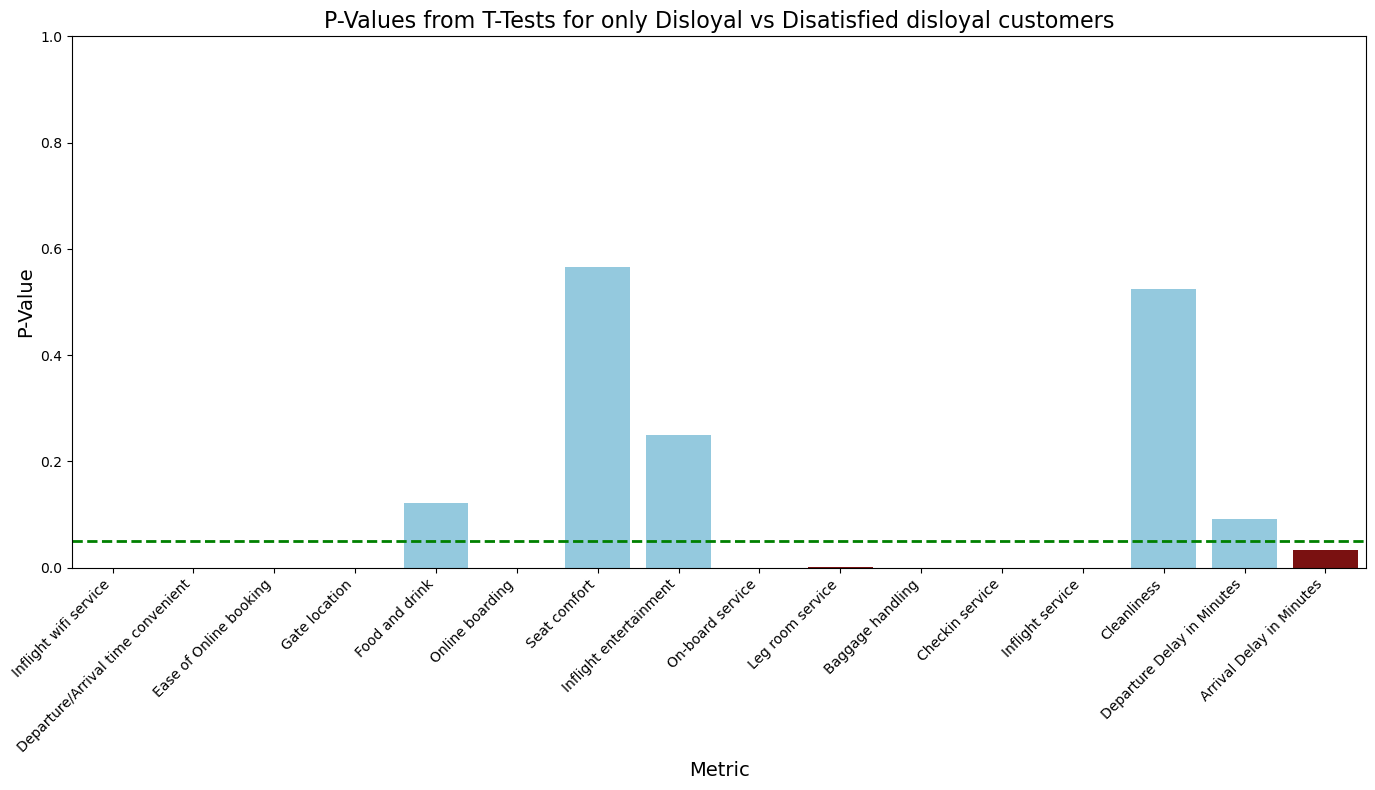

In [70]:
# --- 1. Initialize Lists for Storing Results ---
metric_names = []
p_values = []
is_significant = []
alpha = 0.05 # Significance level

# --- 2. Iterate, Test, and Collect Results ---
for col in metric_columns:
    # Safely convert to numeric and drop NaNs for both comparison groups
    # NOTE: You must have 'dfDisloyal' and 'dfDisatisfied_disloyal' defined outside this loop.
    df_1_data = pd.to_numeric(dfDisloyal[col], errors='coerce').dropna()
    df_2_data = pd.to_numeric(dfDisatisfied_disloyal[col], errors='coerce').dropna()
    
    # Skip if groups are too small or empty after cleaning
    if df_1_data.size < 2 or df_2_data.size < 2:
        print(f"Skipping {col}: Insufficient data.")
        continue

    # Perform Welch's T-Test
    t_statistic, p_value = stats.ttest_ind(
        a=df_1_data,
        b=df_2_data,
        equal_var=False
    )

    # Store results in the lists
    metric_names.append(col)
    p_values.append(p_value)
    is_significant.append(p_value <= alpha)

    # --- Output the Results (Optional, as requested) ---
    print(f"--- T-Test Results for {col} ---")
    print(f"df_1 Mean: {df_1_data.mean():.3f}")
    print(f"df_2 Mean: {df_2_data.mean():.3f}")
    print(f"T-Statistic: {t_statistic:.4f}")
    print(f"P-Value: {p_value:.10f}")
    print("-" * 38)

# --- 3. Create DataFrame for Plotting ---
p_values_df = pd.DataFrame({
    'Metric': metric_names,
    'P_Value': p_values,
    'Is_Significant': is_significant
})

# # Sort the results by P-Value for a cleaner chart
# p_values_df = p_values_df.sort_values(by='P_Value', ascending=True)

# --- 4. Plot the P-Values ---

# Define colors for bars based on significance
# --- Define the mapping dictionary ---
# Create the dictionary that maps the unique hue values (True/False) to colors
palette_map = {
    True: 'darkred',   # For bars where Is_Significant is True
    False: 'skyblue'  # For bars where Is_Significant is False
}

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=p_values_df,
    x='Metric',
    y='P_Value',
    hue='Is_Significant',
    palette=palette_map, # <-- FIX: Pass the dictionary here
    dodge=False,
)
# Add horizontal line at p=0.05
plt.axhline(alpha, color='green', linestyle='--', linewidth=2, label=r'$\alpha = 0.05$ Threshold')

# --- Custom Legend ---
from matplotlib.patches import Patch
custom_handles = [Patch(facecolor=c, label=l) for c, l in zip(legend_colors, legend_labels)]
significance_line = plt.Line2D([0], [0], color='green', linestyle='--', linewidth=2)
final_handles = custom_handles + [significance_line]
final_labels = legend_labels + [r'$\alpha = 0.05$ Threshold']

plt.legend(handles=final_handles, labels=final_labels, title='T-Test Result', loc='upper right')
ax.get_legend().remove() 

# --- Formatting ---
plt.title('P-Values from T-Tests for only Disloyal vs Disatisfied disloyal customers', fontsize=16)
plt.ylabel('P-Value', fontsize=14)
plt.xlabel('Metric', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

--- T-Test Results for Inflight wifi service ---
df_1 Mean: 2.400
df_2 Mean: 2.394
T-Statistic: 0.6064
P-Value: 0.5442639813
--------------------------------------
--- T-Test Results for Departure/Arrival time convenient ---
df_1 Mean: 3.129
df_2 Mean: 2.287
T-Statistic: 64.7514
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results for Ease of Online booking ---
df_1 Mean: 2.547
df_2 Mean: 2.394
T-Statistic: 15.5027
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results for Gate location ---
df_1 Mean: 2.976
df_2 Mean: 3.046
T-Statistic: -6.8515
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results for Food and drink ---
df_1 Mean: 2.958
df_2 Mean: 3.011
T-Statistic: -4.1709
P-Value: 0.0000304613
--------------------------------------
--- T-Test Results for Online boarding ---
df_1 Mean: 2.656
df_2 Mean: 2.425
T-Statistic: 23.2966
P-Value: 0.0000000000
--------------------------------------
--- T-Test Results 

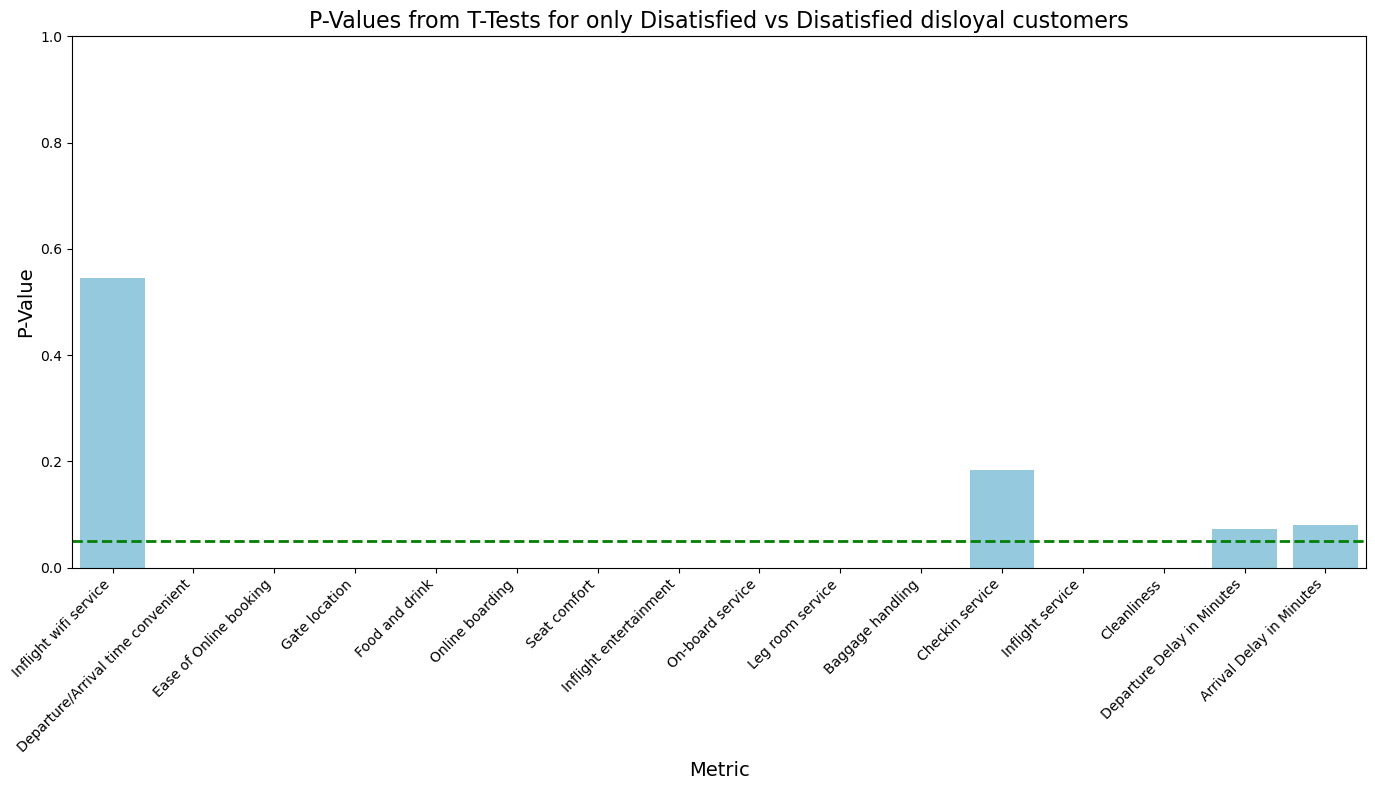

In [69]:
# --- 1. Initialize Lists for Storing Results ---
metric_names = []
p_values = []
is_significant = []
alpha = 0.05 # Significance level

# --- 2. Iterate, Test, and Collect Results ---
for col in metric_columns:
    # Safely convert to numeric and drop NaNs for both comparison groups
    # NOTE: You must have 'dfDisloyal' and 'dfDisatisfied_disloyal' defined outside this loop.
    df_1_data = pd.to_numeric(dfDisatisfied[col], errors='coerce').dropna()
    df_2_data = pd.to_numeric(dfDisatisfied_disloyal[col], errors='coerce').dropna()
    
    # Skip if groups are too small or empty after cleaning
    if df_1_data.size < 2 or df_2_data.size < 2:
        print(f"Skipping {col}: Insufficient data.")
        continue

    # Perform Welch's T-Test
    t_statistic, p_value = stats.ttest_ind(
        a=df_1_data,
        b=df_2_data,
        equal_var=False
    )

    # Store results in the lists
    metric_names.append(col)
    p_values.append(p_value)
    is_significant.append(p_value <= alpha)

    # --- Output the Results (Optional, as requested) ---
    print(f"--- T-Test Results for {col} ---")
    print(f"df_1 Mean: {df_1_data.mean():.3f}")
    print(f"df_2 Mean: {df_2_data.mean():.3f}")
    print(f"T-Statistic: {t_statistic:.4f}")
    print(f"P-Value: {p_value:.10f}")
    print("-" * 38)

# --- 3. Create DataFrame for Plotting ---
p_values_df = pd.DataFrame({
    'Metric': metric_names,
    'P_Value': p_values,
    'Is_Significant': is_significant
})

# # Sort the results by P-Value for a cleaner chart
# p_values_df = p_values_df.sort_values(by='P_Value', ascending=True)

# --- 4. Plot the P-Values ---

# Define colors for bars based on significance
# --- Define the mapping dictionary ---
# Create the dictionary that maps the unique hue values (True/False) to colors
palette_map = {
    True: 'darkred',   # For bars where Is_Significant is True
    False: 'skyblue'  # For bars where Is_Significant is False
}

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=p_values_df,
    x='Metric',
    y='P_Value',
    hue='Is_Significant',
    palette=palette_map, # <-- FIX: Pass the dictionary here
    dodge=False,
)
# Add horizontal line at p=0.05
plt.axhline(alpha, color='green', linestyle='--', linewidth=2, label=r'$\alpha = 0.05$ Threshold')

# --- Custom Legend ---
from matplotlib.patches import Patch
custom_handles = [Patch(facecolor=c, label=l) for c, l in zip(legend_colors, legend_labels)]
significance_line = plt.Line2D([0], [0], color='green', linestyle='--', linewidth=2)
final_handles = custom_handles + [significance_line]
final_labels = legend_labels + [r'$\alpha = 0.05$ Threshold']

plt.legend(handles=final_handles, labels=final_labels, title='T-Test Result', loc='upper right')
ax.get_legend().remove() 

# --- Formatting ---
plt.title('P-Values from T-Tests for only Disatisfied vs Disatisfied disloyal customers', fontsize=16)
plt.ylabel('P-Value', fontsize=14)
plt.xlabel('Metric', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

In [71]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [73]:
dfSatisfied['Customer Type'].value_counts()

Customer Type
Loyal Customer       40533
disloyal Customer     4492
Name: count, dtype: int64

In [72]:
dfDisatisfied['Customer Type'].value_counts()

Customer Type
Loyal Customer       44390
disloyal Customer    14489
Name: count, dtype: int64

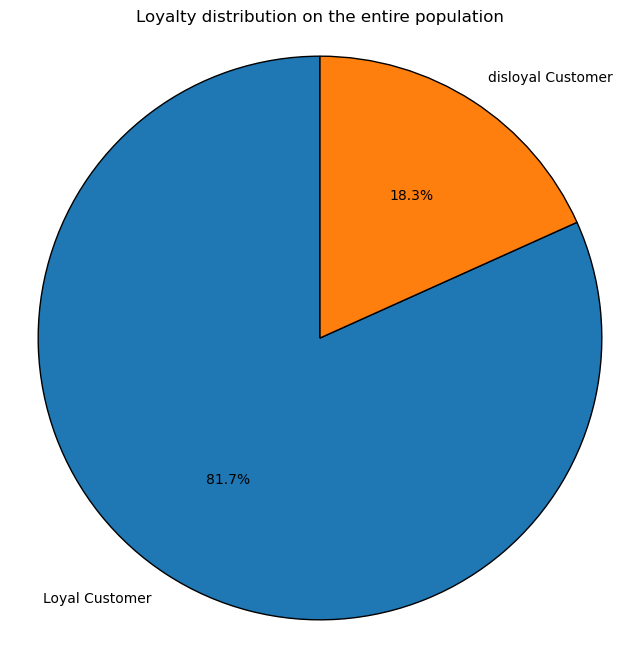

In [78]:
customer_type_counts = df['Customer Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    customer_type_counts,
    labels=customer_type_counts.index,
    # This is the key part: autopct='%1.1f%%' formats the percentage
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Loyalty distribution on the entire population')
plt.axis('equal') # Ensures the pie chart is circular
plt.savefig('customer_type_pie_chart.png')

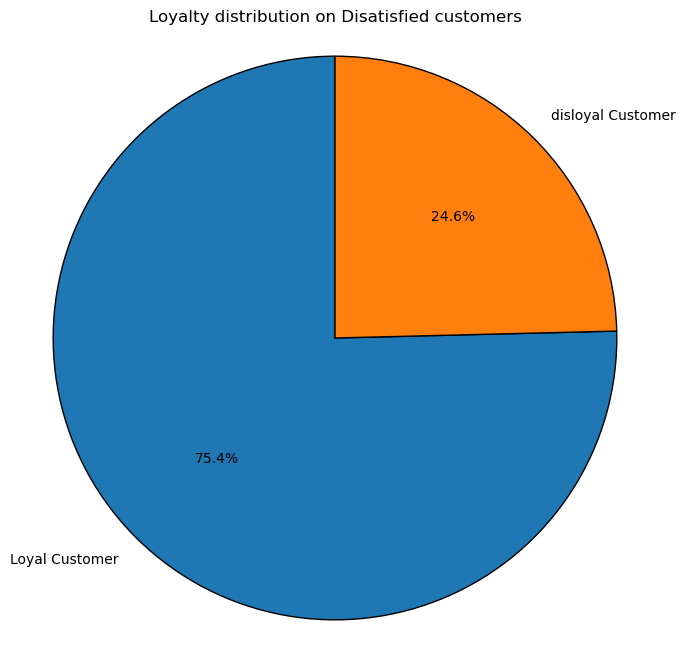

In [80]:
customer_type_counts = dfDisatisfied['Customer Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    customer_type_counts,
    labels=customer_type_counts.index,
    # This is the key part: autopct='%1.1f%%' formats the percentage
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Loyalty distribution on Disatisfied customers')
plt.axis('equal') # Ensures the pie chart is circular
plt.savefig('customer_type_pie_chart.png')

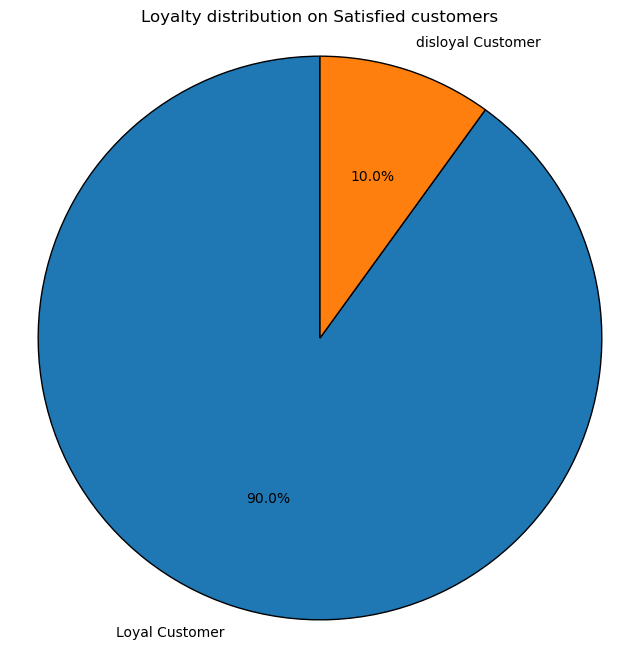

In [79]:
customer_type_counts = dfSatisfied['Customer Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    customer_type_counts,
    labels=customer_type_counts.index,
    # This is the key part: autopct='%1.1f%%' formats the percentage
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Loyalty distribution on Satisfied customers')
plt.axis('equal') # Ensures the pie chart is circular
plt.savefig('customer_type_pie_chart.png')